In [19]:
import numpy as np
import pickle
import os, sys
sys.path.append('..')

from quantumCircuit.methods.aux_methods import *
from quantumCircuit.methods.states import *
from quantumCircuit.methods.gates import *

from matplotlib import pyplot as plt
import matplotlib

nice_blue = 1.1*np.array([94., 138., 210.]) / 256


**Fidelity plots**

HPC_data/ED/Ising_GS_L20_g1-2_h0-1_ED
HPC_data/ED/Ising_GS_L20_g1-4_h0-9045_ED


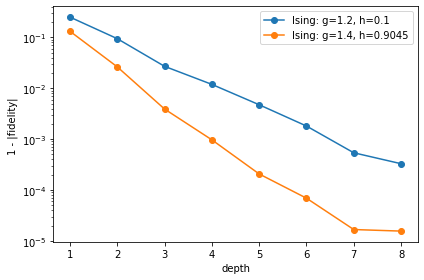

HPC_data/ED/XXZ_GS_L20_delta-0-5_ED
HPC_data/ED/XXZ_GS_L20_delta0-0_ED
HPC_data/ED/XXZ_GS_L20_delta0-5_ED
HPC_data/ED/XXZ_GS_L20_delta1-0_ED


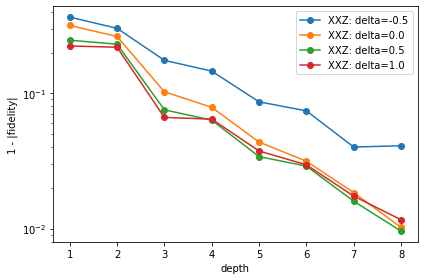

In [7]:
L = 20

for g, h in [(1.2, 0.1), (1.4, 0.9045)]:

    save_filename = f"Ising_GS_L{L}_g{g}_h{h}".replace(".","-")
    print("HPC_data/ED/"+save_filename+"_ED")
    V = load_obj("HPC_data/ED/"+save_filename+"_ED")
    psi = State.vector(V)

    N_iter = 5000

    fidelity_list = []
    depth_list = [x for x in range(1,9)]

    for depth in depth_list:
        data = load_obj("HPC_data/circuits/"+save_filename+f"_depth{depth}_N_iter{N_iter}_circuit")
        psi_circuit = State.vector(data["state"].reshape((-1,1)))
        fidelity = np.sqrt(np.abs(np.vdot(psi.toVector(), psi_circuit.toVector())))
        fidelity_list.append(fidelity)

    plt.plot(depth_list, 1-np.array(fidelity_list)**2, 'o-',label=f"Ising: g={g}, h={h}")

plt.yscale('log')
plt.xlabel("depth")
plt.ylabel("1 - |fidelity| ")
plt.legend()
plt.tight_layout()
plt.savefig(f"figures/fidelityIsing_GS_L{L}.pdf")
plt.show()

depth_list = [x for x in range(1,9)]

for delta in [-0.5, 0.0, 0.5, 1.0]:

    save_filename = f"XXZ_GS_L{L}_delta{delta}".replace(".","-")
    print("HPC_data/ED/"+save_filename+"_ED")
    V = load_obj("HPC_data/ED/"+save_filename+"_ED")
    psi = State.vector(V)

    N_iter = 5000

    fidelity_list = []
    for depth in depth_list:
        data = load_obj("HPC_data/circuits/"+save_filename+f"_depth{depth}_N_iter{N_iter}_circuit")
        psi_circuit = State.vector(data["state"].reshape((-1,1)))
        fidelity = np.sqrt(np.abs(np.vdot(psi.toVector(), psi_circuit.toVector())))
        fidelity_list.append(fidelity)

    plt.plot(depth_list, 1-np.array(fidelity_list), 'o-',label=f"XXZ: delta={delta}")

plt.yscale('log')
#plt.ylim([0.005,1])
plt.xlabel("depth")
plt.ylabel("1 - |fidelity|")
plt.legend()
plt.tight_layout()
plt.savefig(f"figures/fidelityXXZ_GS_L{L}.pdf")
plt.show()

**Site dependent birpartite entanglement entropy**

Code for loading and processing data

HPC_data/ED/Ising_GS_L20_g1-2_h0-1_ED


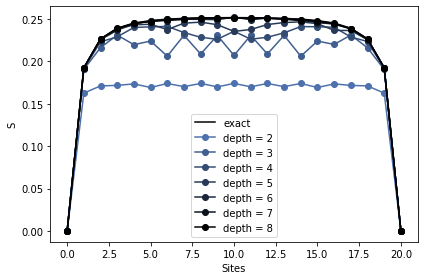

HPC_data/ED/Ising_GS_L20_g1-4_h0-9045_ED


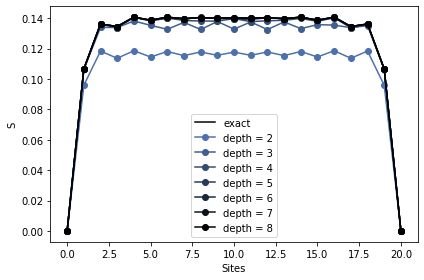

HPC_data/ED/XXZ_GS_L20_delta-0-5_ED


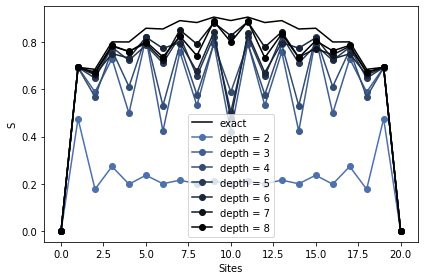

HPC_data/ED/XXZ_GS_L20_delta0-0_ED


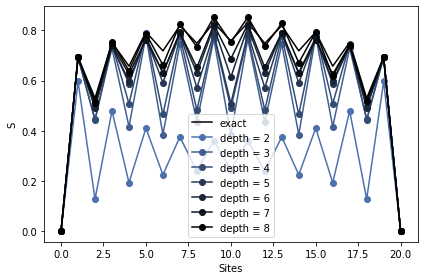

HPC_data/ED/XXZ_GS_L20_delta0-5_ED


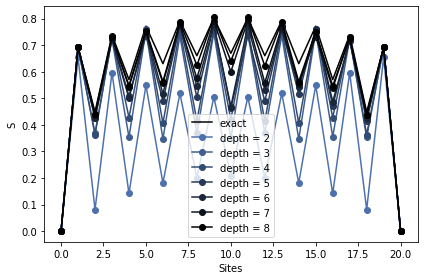

HPC_data/ED/XXZ_GS_L20_delta1-0_ED


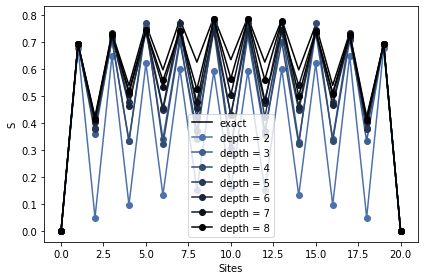

In [23]:
""" Bipartite entanglement entropy plots
"""

L = 20
depth_list = [x for x in range(2,9)]

for g, h in [(1.2, 0.1), (1.4, 0.9045)]:

    save_filename = f"Ising_GS_L{L}_g{g}_h{h}".replace(".","-")
    print("HPC_data/ED/"+save_filename+"_ED")
    V = load_obj("HPC_data/ED/"+save_filename+"_ED")
    psi = State.vector(V)

    entropy_exact = [psi.bipartiteEE([x for x in range(y)]) for y in range(L+1) ]
    entropy_list = [entropy_exact]

    N_iter = 5000

    for depth in depth_list:
        data = load_obj("HPC_data/circuits/"+save_filename+f"_depth{depth}_N_iter{N_iter}_circuit")
        psi_circuit = State.vector(data["state"].reshape((-1,1)))
        entropy_list.append([psi_circuit.bipartiteEE([x for x in range(y)]) for y in range(L+1) ])

    plt.plot(entropy_list[0], 'k')
    for count, entropy in enumerate(entropy_list[1:]):
        plt.plot(entropy, 'o-', color = tuple((depth_list[-1]-depth_list[count])/depth_list[-1]*nice_blue))

    plt.xlabel("Sites")
    plt.ylabel("S")
    plt.legend(["exact"] + [f"depth = {depth}" for depth in depth_list])
    plt.tight_layout()
    plt.savefig(f"figures/entropyIsing_GS_L{L}_g{g}_h{h}.pdf")
    plt.show()

for delta in [-0.5, 0.0, 0.5, 1.0]:

    save_filename = f"XXZ_GS_L{L}_delta{delta}".replace(".","-")
    print("HPC_data/ED/"+save_filename+"_ED")
    V = load_obj("HPC_data/ED/"+save_filename+"_ED")
    psi = State.vector(V)

    entropy_exact = [psi.bipartiteEE([x for x in range(y)]) for y in range(L+1) ]
    entropy_list = [entropy_exact]

    N_iter = 5000

    for depth in depth_list:
        data = load_obj("HPC_data/circuits/"+save_filename+f"_depth{depth}_N_iter{N_iter}_circuit")
        psi_circuit = State.vector(data["state"].reshape((-1,1)))
        entropy_list.append([psi_circuit.bipartiteEE([x for x in range(y)]) for y in range(L+1) ])

    plt.plot(entropy_list[0], 'k')
    for count, entropy in enumerate(entropy_list[1:]):
        plt.plot(entropy, 'o-', color = tuple((depth_list[-1]-depth_list[count])/depth_list[-1]*nice_blue))

    plt.xlabel("Sites")
    plt.ylabel("S")
    plt.legend(["exact"] + [f"depth = {depth}" for depth in depth_list])
    plt.tight_layout()
    plt.savefig(f"figures/entropyXXZ_GS_L{L}_delta{delta}.pdf")
    plt.show()

**Time-dependent half-chain entropy**

Loading and processing data

In [ ]:
""" Bipartite entanglement entropy plots
"""

L = 20
g = 1.4
h = 0.1

T_list = np.linspace(0.25,4,16)

entropy_exact = []

for T in T_list:

    save_filename = f"Ising_evolution_L{L}_g{g}_h{h}_T{T}".replace(".","-")
    V = load_obj("HPC_data/ED_evolution/"+save_filename+"_evolution")
    psi = State.vector(V)

    entropy_exact.append(psi.bipartiteEE([x for x in range(L//2)]))
entropy_list = [entropy_exact]

N_iter = 5000

for depth in range(1,7):
    entropy = []
    for T in T_list:
        save_filename = f"Ising_evolution_L{L}_g{g}_h{h}_T{T}".replace(".","-")
        data = load_obj("HPC_data/circuits_evolution/"+save_filename+f"_depth{depth}_N_iter{N_iter}_circuit")
        psi_circuit = State.vector(data["state"].reshape((-1,1)))
        entropy.append(psi_circuit.bipartiteEE([x for x in range(L//2)]))
    entropy_list.append(entropy)


Plot data

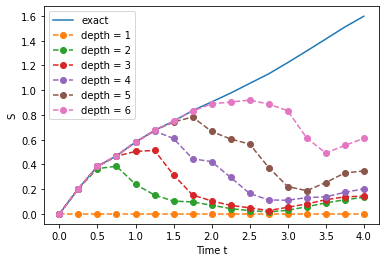

In [ ]:
plt.plot([0] + list(T_list),[0] + entropy_list[0])

for entropy in entropy_list[1:]:
    plt.plot([0] + list(T_list),[0] + entropy, 'o--')

plt.xlabel("Time t")
plt.ylabel("S")
plt.legend(["exact"] + [f"depth = {x+1}" for x in range(len(entropy)-1)])
plt.show()

In [ ]:
""" Bipartite entanglement entropy plots
"""

L = 20
g = 1.2
h = 0.1

save_filename = f"Ising_GS_L{L}_g{g}_h{h}".replace(".","-")
print("HPC_data/ED/"+save_filename+"_ED")
V = load_obj("HPC_data/ED/"+save_filename+"_ED")
psi = State.vector(V)

depth = 5
N_iter = 5000
data = load_obj("HPC_data/circuits/"+save_filename+f"_depth{depth}_N_iter{N_iter}_circuit")
psi_circuit = State.vector(data["state"].reshape((-1,1)))

MI_exact = []
MI = []
for kk in range(1,10):
    qubits = [(kk-1)/2 + x for x in range(L-kk)]
    MI_exact.append(np.array([psi.mutualInformation([y],[y+kk]) for y in range(L-kk)]))
    MI.append(np.array([psi_circuit.mutualInformation([y],[y+kk]) for y in range(L-kk)]))


HPC_data/ED/Ising_GS_L20_g1-2_h0-1_ED


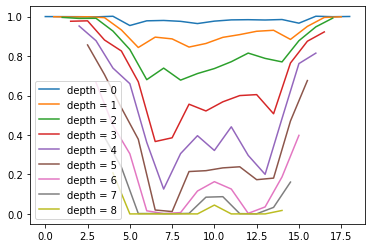

In [ ]:
for kk in range(len(MI)):
    qubits = [(kk)/2 + x for x in range(L-kk-1)]
    plt.plot(qubits,MI[kk]/MI_exact[kk])
plt.legend([f"depth = {x}" for x in range(9)])
plt.show()

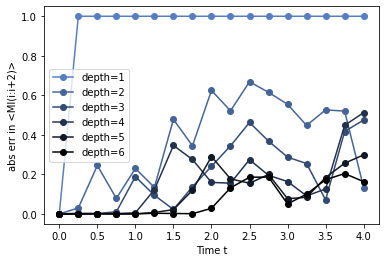

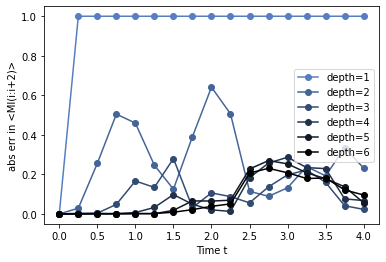

In [48]:
""" Mutual information time evolution
"""

L = 20
g = 1.4
h = 0.9045

T_list = np.linspace(0.25,4,16)

entropy_exact = []

depth = 2
N_iter = 5000

k_range = 2

for g, h in [(1.4, 0.1), (1.4, 0.9045)]:
    MI_exact_list = []
    for T in T_list:

        save_filename = f"Ising_evolution_L{L}_g{g}_h{h}_T{T}".replace(".","-")
        V = load_obj("HPC_data/ED_evolution/"+save_filename+"_evolution")
        psi = State.vector(V)
        qubits = [(k_range-1)/2 + x for x in range(L-k_range)]
        MI_exact = (np.array([psi.mutualInformation([y],[y+k_range]) for y in range(L-k_range)]))
        MI_exact_list.append(np.average(MI_exact))

    #plt.plot([0] + list(T_list),[0] + MI_exact_list, '-', color='C1', label="exact")

    depth_list = [x for x in range(1,7)]
    for depth in depth_list:
        MI_list = []
        for T in T_list:

            save_filename = f"Ising_evolution_L{L}_g{g}_h{h}_T{T}".replace(".","-")
            data = load_obj("HPC_data/circuits_evolution/"+save_filename+f"_depth{depth}_N_iter{N_iter}_circuit")
            psi_circuit = State.vector(data["state"].reshape((-1,1)))

            qubits = [(k_range-1)/2 + x for x in range(L-k_range)]
            MI = (np.array([psi_circuit.mutualInformation([y],[y+k_range]) for y in range(L-k_range)]))
            MI_list.append(np.average(MI))
            
        color = tuple((depth_list[-1]-depth)/depth_list[-1]*nice_blue)
        plt.plot([0] + list(T_list),np.abs(np.array([0] + MI_list) - np.array([0] + MI_exact_list))/(np.array([0] + MI_exact_list) + 10**(-8)), 'o-', color = color, label=f"depth={depth}")

    plt.xlabel("Time t")
    plt.ylabel(f"abs err in <MI(i:i+{k_range})>")
    plt.legend()
    plt.savefig(f"figures/MI_Ising_GS_range{k_range}_L{L}_h{h}_g{g}.pdf")
    plt.show()


In [ ]:
L = 20
g = 1.4
h = 0.9045

save_filename = f"Ising_GS_L{L}_g{g}_h{h}".replace(".","-")
save_filename = f"XXZ_GS_L{L}_delta-0-5".replace(".","-")
print("HPC_data/ED/"+save_filename+"_ED")
V = load_obj("HPC_data/ED/"+save_filename+"_ED")
psi = State.vector(V)

rho = psi.reducedDensityMatrix([6,7,8,9,10,11,12,13])

new_psi = rho.canonical_purification()

print(new_psi.bipartiteEE([0,1,2,6,7,8]))
print(new_psi.N)
print(rho.entropy())
print(rho.reflected_entropy([0,1,2,3]))
print(rho.reflected_h([0,1,2,3]))

HPC_data/ED/XXZ_GS_L20_delta-0-5_ED
1.729584806542336
16
1.3678910013017513
1.211286225269542
0.23852860509859308
